## Dataset

On considère pour ce brief , le dataset Titanic qui représente les données des passagers (utilisé généralement pour prédire les taux de survie des passagers.) 

Le dataset Titanic contient plusieurs colonnes décrivant diverses informations sur les passagers du Titanic, leur classe, leur âge, leur sexe, leur tarif, etc..

Voici la description des principales colonnes de ce dataset afin de pouvoir utiliser ces données pour effectuer diverses analyses et explorations :

1. **survived :** Cette colonne indique si le passager a survécu ou non au naufrage du Titanic. Les valeurs possibles sont 0 (n'est pas survécu) et 1 (a survécu).

2. **pclass :** Cette colonne représente la classe du billet du passager, où 1 correspond à la première classe, 2 à la deuxième classe et 3 à la troisième classe.

3. **sex :** Cette colonne indique le sexe du passager, c'est-à-dire s'il s'agit d'un homme ou d'une femme.

4. **age :** La colonne 'age' contient l'âge du passager. Il peut y avoir des valeurs manquantes dans cette colonne.

5. **sibsp :** Cette colonne représente le nombre de frères, de sœurs, d'époux ou d'épouses du passager à bord du Titanic.

6. **parch :** La colonne 'parch' indique le nombre de parents ou d'enfants du passager à bord du Titanic.

7. **fare :** Cette colonne donne le tarif payé par le passager pour son billet.

8. **embarked :** La colonne 'embarked' indique le port d'embarquement du passager. Les valeurs possibles sont C (Cherbourg), Q (Queenstown) et S (Southampton).

9. **class :** Cette colonne est similaire à 'pclass' et représente également la classe du billet, mais sous forme de chaînes de caractères (1ère, 2ème, 3ème).

10. **who :** La colonne 'who' catégorise les passagers en trois groupes : homme, femme ou enfant.

11. **adult_male :** Cette colonne indique si le passager est un homme adulte (True/False).

12. **deck :** La colonne 'deck' contient des informations sur le pont où le passager avait sa cabine. Il peut y avoir des valeurs manquantes dans cette colonne.

13. **embark_town :** Cette colonne est similaire à 'embarked' et indique également le nom de la ville d'embarquement.

14. **alive :** Cette colonne est similaire à 'survived' et indique si le passager est en vie (yes) ou non (no).

15. **alone :** La colonne 'alone' indique si le passager voyageait seul (True/False).



Objectifs:

- charger le dataset et vérifier la qualité des données (nombre de lignes, nombre et types de colonnes, valeurs manquantes, valeurs aberrantes..)

-Bonus: faire une petite analyse exploratoire du dataset (avec eventuellement une visualisation)..


# Projet Titanic  

In [651]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [652]:
sns.set_style('whitegrid')

In [653]:
titanic_df = sns.load_dataset('titanic')

In [654]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [655]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Partie 1: Prise en main du Dataset

###  Vérifier si Données Manquantes : 

Des valeurs manquantes peuvent être présentes dans certaines colonnes, par exemple, l'âge de certains passagers ..

vérifier les valeurs manquantes des colonnes et proposer une solution pour y remédier.

In [656]:
# Détection de valeurs manquantes
print(titanic_df.isnull().sum(),"\n")

print(f"La liste des colonnes de la dataframe avec des elements manquants : {list(titanic_df.columns[titanic_df.isnull().any()])}\n")
print("Les solutions possibles pour gerer cette situation sont :\n 1) supprimer les lignes avec des valeurs manquantes\n 2) remplacer les valeurs manquantes par des moyennes\n")

print("Choix de la solution 1 :\n")
titanic_df.dropna(how="any", inplace= True)
print(f"La liste des colonnes de la dataframe avec des elements manquants après traitement : {list(titanic_df.columns[titanic_df.isnull().any()])}\n")


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64 

La liste des colonnes de la dataframe avec des elements manquants : ['age', 'embarked', 'deck', 'embark_town']

Les solutions possibles pour gerer cette situation sont :
 1) supprimer les lignes avec des valeurs manquantes
 2) remplacer les valeurs manquantes par des moyennes

Choix de la solution 1 :

La liste des colonnes de la dataframe avec des elements manquants après traitement : []



### Vérifier si Incohérences dans les Valeurs 

Il peut y avoir des incohérences dans les données, comme des âges négatifs, des tarifs négatifs, ou des numéros de cabine incorrects..



In [657]:
print(titanic_df.describe())
print("\n D'apres ce tableau, il n y a pas de valeurs incoherentes.")

         survived      pclass         age       sibsp       parch        fare
count  182.000000  182.000000  182.000000  182.000000  182.000000  182.000000
mean     0.675824    1.192308   35.623187    0.467033    0.478022   78.919735
std      0.469357    0.516411   15.671615    0.645007    0.755869   76.490774
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   24.000000    0.000000    0.000000   29.700000
50%      1.000000    1.000000   36.000000    0.000000    0.000000   57.000000
75%      1.000000    1.000000   47.750000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200

 D'apres ce tableau, il n y a pas de valeurs incoherentes.


### Verifier les données Aberrantes (Outliers)

Des valeurs aberrantes peuvent être présentes dans certaines colonnes, par exemple, des tarifs extrêmement élevés ou des âges très élevés.



In [658]:
df_numeric = titanic_df.select_dtypes(include=np.number)
df_data = pd.DataFrame(columns=df_numeric.columns)


#print(df_numeric.columns)
for colname in df_numeric.columns :
    condition = df_numeric[colname] > df_numeric[colname].mean() + 3 * df_numeric[colname].std()
    df_numeric[str(colname)+"_bool"] = condition
    sub_df_titanic = df_numeric[condition]

    if not sub_df_titanic.empty :
        df_data = pd.concat([df_data, sub_df_titanic], axis=0)

    
df_data.fillna(False, inplace=True)
print(df_data.head())
#df_data.to_csv("testCSV.csv")

    survived pclass   age sibsp parch     fare survived_bool pclass_bool  \
10         1      3   4.0     1     1  16.7000         False        True   
75         0      3  25.0     0     0   7.6500         False        True   
205        0      3   2.0     0     1  10.4625         False        True   
251        0      3  29.0     1     1  10.4625         False        True   
394        1      3  24.0     0     2  16.7000         False        True   

     age_bool  sibsp_bool  parch_bool  fare_bool  
10      False       False       False      False  
75      False       False       False      False  
205     False       False       False      False  
251     False       False       False      False  
394     False       False       False      False  


C:\Users\moham\AppData\Local\Temp\ipykernel_40572\1315744374.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_data = pd.concat([df_data, sub_df_titanic], axis=0)
C:\Users\moham\AppData\Local\Temp\ipykernel_40572\1315744374.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data.fillna(False, inplace=True)


### Vérifier les Doublons 


Il peut y avoir des lignes en double dans le dataset, ce qui signifie que les mêmes données apparaissent plusieurs fois et il faut donc les supprimer

In [659]:
# Vérifier les lignes en double dans le DataFrame
print(f"Il y a {titanic_df.shape[0]} ligne(s) dans la dataframe avant traitement")
duplicates = titanic_df.duplicated()

# Sélectionner les lignes en double dans le DataFrame
duplicated_rows = titanic_df[duplicates]
print(f"\nIl y a {len(duplicated_rows)} ligne(s) dupliquee(s)")

# Affichage des lignes en double
print("\nLignes en double :")
print(duplicated_rows)

titanic_df.drop(duplicated_rows.index, inplace= True)
print(f"\nIl y a {titanic_df.shape[0]} ligne(s) dans la dataframe apres traitement")


Il y a 182 ligne(s) dans la dataframe avant traitement

Il y a 1 ligne(s) dupliquee(s)

Lignes en double :
     survived  pclass     sex   age  sibsp  parch  fare embarked  class  \
641         1       1  female  24.0      0      0  69.3        C  First   

       who  adult_male deck embark_town alive  alone  
641  woman       False    B   Cherbourg   yes   True  

Il y a 181 ligne(s) dans la dataframe apres traitement


### Vérifier si colonnes Inutiles 

Certaines colonnes peuvent contenir des données redondantes ou inutiles pour l'analyse.

In [660]:
#TBD

## Bonus

**Continuez l'exploration du dataset Titanic avec d'autres axes d'analyse **



1-Quelle est la répartition des passagers par classe (1ère, 2ème, 3ème) à bord du Titanic ?

2- Quelle est la répartition des passagers par sexe à bord du Titanic ?

3- Quel était l'âge moyen des passagers à bord du Titanic ? Y avait-il des passagers très jeunes ou très âgés ?

4- Combien de passagers ont survécu au naufrage du Titanic ? Quelle était leur répartition par classe, sexe et âge ?


Text(0.5, 1.0, 'Passengers distribution by class on Titanic Boat')

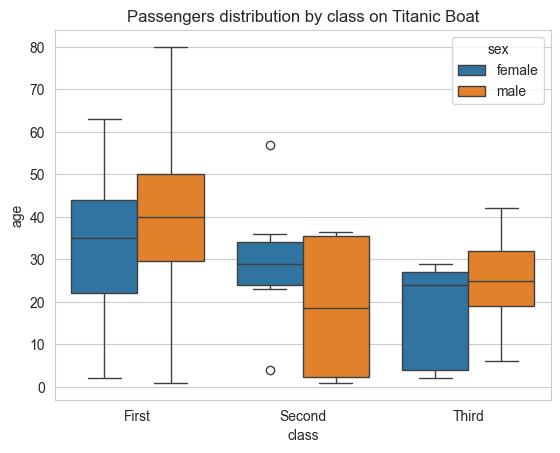

In [719]:
sns.boxplot(data=titanic_df, x="class", y="age", hue="sex").set_title('Passengers distribution by class on Titanic Boat')


sex
male      94
female    87
Name: count, dtype: int64


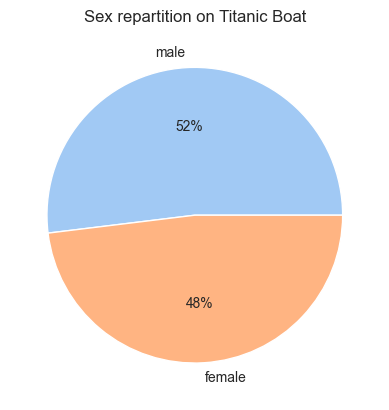

In [720]:
sex_distribution = titanic_df["sex"].value_counts()
print(sex_distribution)
colors = sns.color_palette('pastel')[0:5]
plt.pie(sex_distribution, labels=["male","female"], colors = colors, autopct='%.0f%%')
plt.title("Sex repartition on Titanic Boat")
plt.show()

L'age moyen au sein du Titanic etait de 36.0 ans.
La personne la plus vielle avait 80.0 ans et la plus jeune avait 0.92 ans.


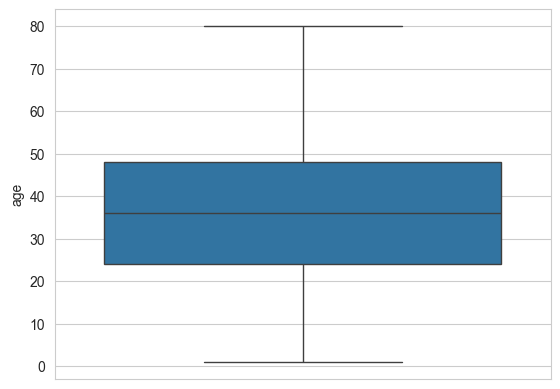

In [747]:
print(f"L'age moyen au sein du Titanic etait de {round(titanic_df["age"].mean(),0)} ans.")
sns.boxplot(data=titanic_df["age"])
titanic_df["age"].describe()
print(f"La personne la plus vielle avait {titanic_df["age"].max()} ans et la plus jeune avait {titanic_df["age"].min()} ans.")

Il y a 181 passagers qui ont survecu au nauvrage du Titanic


Text(0.5, 1.0, 'Survivors of Titanic distribution by class, age and sex')

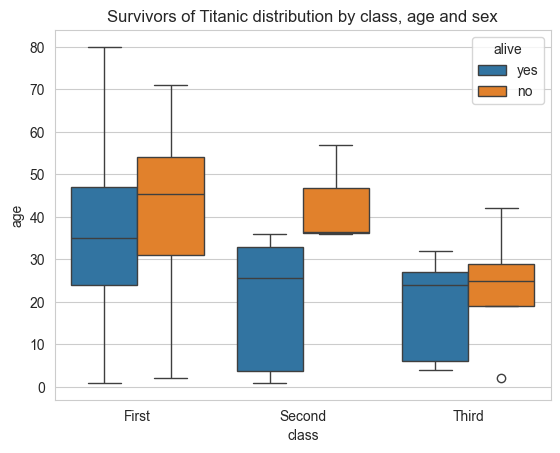

In [748]:
print(f"Il y a {titanic_df["alive"].count()} passagers qui ont survecu au nauvrage du Titanic")
sns.boxplot(data=titanic_df, x="class", y="age", hue="alive").set_title('Survivors of Titanic distribution by class, age and sex')